In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal


# Data Analysis

## import data

In [ ]:


df = pd.read_csv("/home/elbaz/Bureau/stampli_HA/disney-reviews/DisneylandReviews.csv", encoding="latin-1")

In [6]:
df.shape

(42656, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [8]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


## Visualize Rating

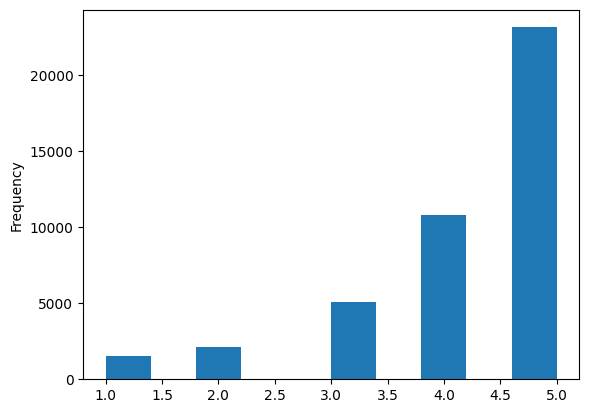

In [10]:
df.Rating.plot.hist()
plt.show()

## Time Analysis

In [12]:
df.Year_Month.value_counts()

Year_Month
missing    2613
2015-8      786
2015-7      759
2015-12     701
2015-6      692
           ... 
2010-8        7
2010-5        4
2019-5        2
2010-3        2
2010-4        1
Name: count, Length: 112, dtype: int64

In [13]:
# remove all missing values (Year_Month=="missing")
df = df[df.Year_Month != "missing"]


In [ ]:
# split year and month from date (format year-month)
df['year'] = df.Year_Month.apply(lambda x: x.split('-')[0])
df['month'] = df.Year_Month.apply(lambda x: x.split('-')[1])

# year month to int type
df.year = df.year.astype(int)
df.month = df.month.astype(int)

# remove Year_Month column
df = df.drop(columns=['Year_Month'])

In [23]:
df.year.value_counts()

year
2015    6979
2016    6599
2014    5301
2017    5195
2013    4717
2012    4342
2018    3997
2011    1984
2019     786
2010     143
Name: count, dtype: int64

In [24]:
df.month.value_counts()

month
8     3994
7     3880
12    3874
10    3764
6     3590
4     3478
5     3439
9     3230
3     3134
11    2685
1     2516
2     2459
Name: count, dtype: int64

In [ ]:
# correlation Kruskal-Wallis test between rating and month
grouped_data = []
for month in df.month.unique():
    grouped_data.append(df[df.month == month].sample(2400).Rating.tolist())

stat, p = kruskal(*grouped_data)

print(f"Statistic: {stat}, p-value: {p}")

Statistic: 86.73274199696854, p-value: 7.259584022579857e-14


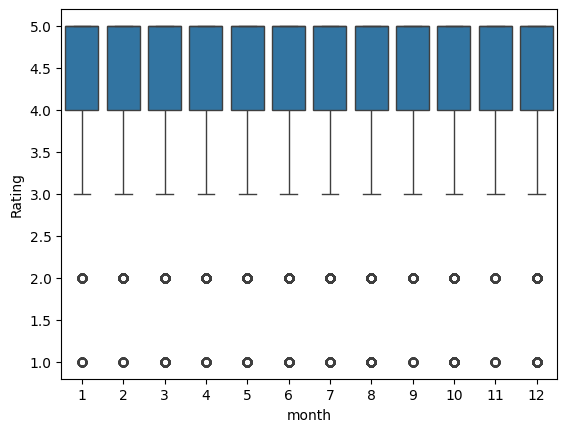

In [ ]:
sns.boxplot(x="month", y="Rating", data=df)
plt.show()

## Location Analysis

In [47]:
df.Reviewer_Location.value_counts()[:20]

Reviewer_Location
United States           13522
United Kingdom           9115
Australia                4412
Canada                   2116
India                    1470
Philippines              1024
Singapore                 971
New Zealand               714
Malaysia                  562
Hong Kong                 515
Indonesia                 511
Ireland                   456
United Arab Emirates      339
Netherlands               239
South Africa              233
France                    223
Thailand                  216
Germany                   182
China                     167
Spain                     132
Name: count, dtype: int64

In [52]:
def get_country_region(country):
    """
    Returns the world region for a given country.
    
    Args:
        country (str): The name of the country
        
    Returns:
        str: The world region name, or "Unknown" if country not found
    """
    
    # Define the 8 world regions and their countries
    regions = {
        "North America": [
            'United States', 'Canada', 'Mexico', 'Guatemala', 'Honduras', 
            'Nicaragua', 'Costa Rica', 'Panama', 'Cuba', 'Haiti', 
            'Dominican Republic', 'Jamaica', 'The Bahamas', 'Barbados', 
            'Trinidad and Tobago', 'Antigua and Barbuda', 'Grenada',
            'Puerto Rico', 'U.S. Virgin Islands', 'Turks and Caicos Islands',
            'Cayman Islands', 'Aruba', 'Curaçao', 'Caribbean Netherlands'
        ],
        
        "South America": [
            'Brazil', 'Argentina', 'Chile', 'Peru', 'Colombia', 'Venezuela',
            'Ecuador', 'Bolivia', 'Paraguay', 'Uruguay', 'Guyana', 'Suriname',
            'French Guiana', 'Falkland Islands (Islas Malvinas)'
        ],
        
        "Europe": [
            'United Kingdom', 'France', 'Germany', 'Italy', 'Spain', 'Netherlands',
            'Belgium', 'Switzerland', 'Austria', 'Sweden', 'Norway', 'Denmark',
            'Finland', 'Portugal', 'Greece', 'Ireland', 'Croatia', 'Romania',
            'Ukraine', 'Poland', 'Czechia', 'Hungary', 'Bulgaria', 'Serbia',
            'Montenegro', 'Bosnia and Herzegovina', 'Slovenia', 'Slovakia',
            'Estonia', 'Latvia', 'Lithuania', 'Iceland', 'Malta', 'Cyprus',
            'Luxembourg', 'North Macedonia', 'Albania', 'Moldova', 'Monaco',
            'Andorra', 'Jersey', 'Guernsey', 'Isle of Man', 'Gibraltar',
            'Åland Islands'
        ],
        
        "Asia": [
            'China', 'India', 'Japan', 'South Korea', 'Indonesia', 'Thailand',
            'Malaysia', 'Singapore', 'Philippines', 'Vietnam', 'Myanmar (Burma)',
            'Cambodia', 'Laos', 'Taiwan', 'Hong Kong', 'Macau', 'Mongolia',
            'Kazakhstan', 'Uzbekistan', 'Afghanistan', 'Pakistan', 'Bangladesh',
            'Sri Lanka', 'Nepal', 'Iran', 'Iraq', 'Turkey', 'Armenia',
            'Azerbaijan', 'Georgia', 'Brunei', 'Timor-Leste', 'Maldives'
        ],
        
        "Middle East": [
            'Saudi Arabia', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Bahrain',
            'Oman', 'Yemen', 'Israel', 'Palestine', 'Jordan', 'Lebanon', 'Syria'
        ],
        
        "Africa": [
            'South Africa', 'Egypt', 'Nigeria', 'Kenya', 'Uganda', 'Tanzania',
            'Ethiopia', 'Ghana', 'Morocco', 'Algeria', 'Tunisia', 'Libya',
            'Sudan', 'South Sudan', 'Rwanda', 'Zambia', 'Zimbabwe', 'Botswana',
            'Namibia', 'Mali', 'Senegal', "Côte d'Ivoire", 'Mozambique',
            'Madagascar', 'Mauritius', 'Seychelles', 'Democratic Republic of the Congo',
            'Malawi', 'El Salvador'
        ],
        
        "Oceania": [
            'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Vanuatu',
            'Solomon Islands', 'Cook Islands', 'French Polynesia', 'Guam',
            'Northern Mariana Islands'
        ],
        
        "Russia & Central Asia": [
            'Russia'
        ]
    }
    
    # Create a reverse mapping from country to region
    country_to_region = {}
    for region, countries in regions.items():
        for country_name in countries:
            country_to_region[country_name] = region
    
    # Return the region for the given country
    return country_to_region.get(country, "Unknown")


# apply function to country column
df['Reviewer_Global_Region'] = df.Reviewer_Location.apply(get_country_region)


In [54]:
df.Reviewer_Global_Region.value_counts()

Reviewer_Global_Region
North America            15833
Europe                   11733
Asia                      5868
Oceania                   5159
Middle East                798
Africa                     430
South America              179
Russia & Central Asia       43
Name: count, dtype: int64

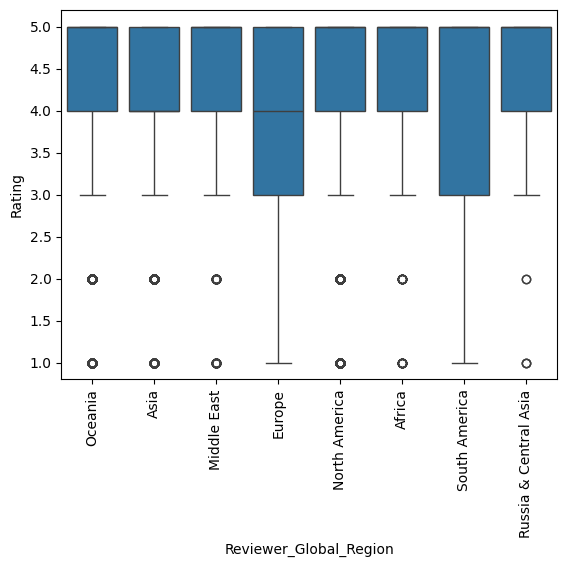

In [ ]:
sns.boxplot(x="Reviewer_Global_Region", y="Rating", data=df)
plt.xticks(rotation=90)
plt.show()

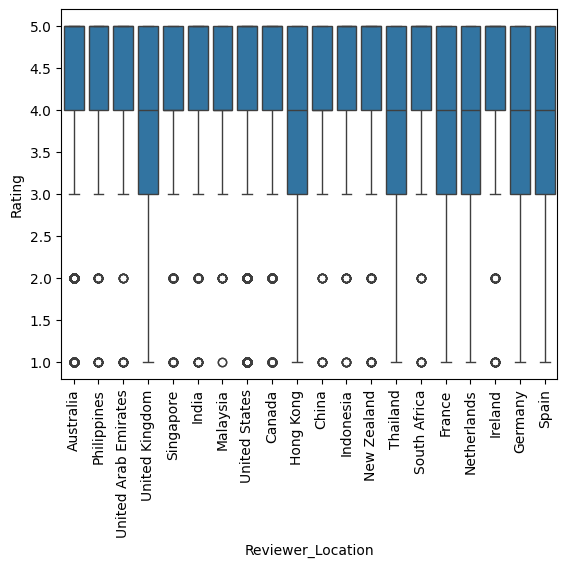

In [ ]:
sns.boxplot(x="Reviewer_Location", y="Rating", data=df[df.Reviewer_Location.isin(df.Reviewer_Location.value_counts().index[:20])])
plt.xticks(rotation=90)
plt.show()

## Branch

In [56]:
df.Branch.value_counts()

Branch
Disneyland_California    18202
Disneyland_Paris         12694
Disneyland_HongKong       9147
Name: count, dtype: int64

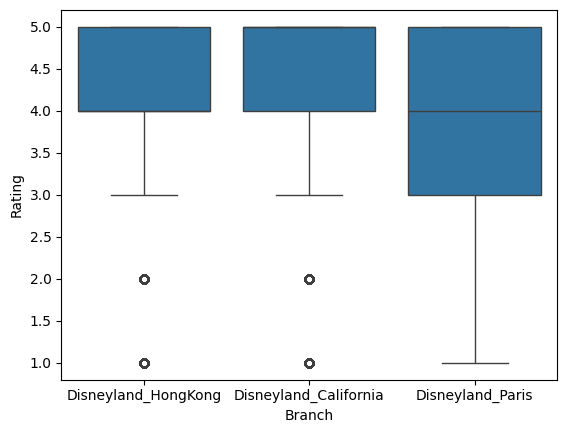

In [ ]:
sns.boxplot(x="Branch", y="Rating", data=df)
plt.show()

## Review Text

In [65]:
df.Review_Text.sample(10).values

array(["First of all, I am a Disney nut! Multiple trips to Disneyland and Disney World, Multiple Disney cruises, and a Disney Vacation Club member. Never having been to a Park outside the US, I did a lot of reading of reviews and comments. I realized that it wouldn't be Disney World, and I really downgraded my expectations based on what I read. I was completely surprised by my experience at Disneyland Paris. The Park is beautiful. It's smaller than Disney World, but what isn't? I thought the landscaping, the buildings, the restrooms and the rides were extremely well kept up. And in the Parks and hotel, I had nothing but positive interactions with Cast members. So much for the negativity I anticipated.The rides and attractions were a combination of familiar and new. And many of the familiar had different twists. Big Thunder Mountain is much more of a thrill ride, starting with the initial rush under the lake to get to the  mountain . Pirates of the Caribbean is a longer ride with more t

In [66]:
df.shape

(40043, 8)

In [69]:
df[df.Branch=="Disneyland_Paris"].Reviewer_Global_Region.value_counts()

Reviewer_Global_Region
Europe                   9447
North America            1413
Asia                      628
Oceania                   600
Middle East               339
Africa                    184
South America              63
Russia & Central Asia      20
Name: count, dtype: int64

In [71]:
df[df.Reviewer_Location=='France'].Review_Text.sample(10).values

array(["The main reason for visiting Disney, the park is still amazing and the rides are good. The new additions of mickeys magical theatre and the princess pavilion are nice.I feel maybe one or two more rides should be fast pass access but that's me.As expected everything inside is ott price wise but the whole magical experience of parades and show make up for that.",
       "We spent two days in Disneyland Paris. It's a nice place for kids but there are not enough action attractions for adults. A big plus is though the wheelchair accessibility (priority access toilets ramps map of fully accessible attractions). Prices for food and drinks are impressively high and there's not that much choice when it comes to fresh food. Unfortunately, many attractions were closed for renovations (like the Star Wars Simulator). It was nice to see the Disney Dream Castle and I can highly recommend Buzz Lightyear Laser Blast and Pirates of the Caribbean.",
       'well expereince is waiting is long but 

In [72]:
df_fr = df[df.Reviewer_Location == "France"]

In [73]:
df_fr.shape

(223, 8)

In [74]:
from disney_review_analyzer import DisneyReviewAnalyzer

In [76]:


analyzer = DisneyReviewAnalyzer(
    model_name="gpt-4o-mini",
    batch_size=10,
    max_concurrency=5
)

res = await analyzer.analyze_df_async(df_fr, output_path="disney_reviews_fr_analysis.csv")

INFO:disney_review_analyzer:DisneyReviewAnalyzer initialized with OpenAI gpt-4o-mini
INFO:disney_review_analyzer:Found 223 reviews to analyze
INFO:disney_review_analyzer:Processing 223 reviews in 23 batches with max concurrency 5
Processing batches:   0%|          | 0/23 [00:00<?, ?it/s]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Processing batches:   4%|▍         | 1/23 [00:09<03:36,  9.83s/it]INFO:disney_review_analy

# Natural Language Question

In [2]:
df_fr_analyzed = pd.read_csv("disney_reviews_fr_analysis.csv")

df_fr_analyzed.has_children.fillna(False, inplace=True)
df_fr_analyzed.popular_attractions.fillna('unknown', inplace=True)
df_fr_analyzed['popular_attractions'] = df_fr_analyzed['popular_attractions'].apply(lambda x: x.split(';') if isinstance(x, str) else [])
df_fr_analyzed.main_complaint.fillna('not_mentioned', inplace=True)
df_fr_analyzed['main_complaint'] = df_fr_analyzed['main_complaint'].apply(lambda x: "not_mentioned" if x in ['none', 'not mentioned'] else x)

import random
df_fr_analyzed['month'] = random.choices(range(1, 13), k=len(df_fr_analyzed))

# remove year column
df_fr_analyzed.drop(columns=['year'], inplace=True)

# change month number to month name
import datetime
df_fr_analyzed['month'] = df_fr_analyzed['month'].apply(lambda x: datetime.datetime(1900, int(x), 1).strftime('%B'))


/tmp/ipykernel_479554/940065791.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fr_analyzed.has_children.fillna(False, inplace=True)
/tmp/ipykernel_479554/940065791.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fr_analyzed.has_children.fillna(False, inplace=True)
/tmp/ipykernel_479554/940065791.

In [3]:
from disney_superlinked import create_disney_rag_system

# Create RAG system
qa_chain = create_disney_rag_system(df_fr_analyzed)

# Ask questions
result = qa_chain("What do families think about attractions?")
print(result['result'])

2025-08-24 15:04:42 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "framework" not found in config.yaml')
2025-08-24 15:04:42 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
2025-08-24 15:04:42 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
2025-08-24 15:04:42 [debug    ] YAML configuration not available, falling back to dotenv error=KeyError('yaml_config_section key "resource" not found in config.yaml')
✅ Superlinked application initialized successfully
✅ Indexed 223 Disney reviews successfully
✅ Disney RAG system ready with 223 reviews


/tmp/ipykernel_479554/93623539.py:7: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa_chain("What do families think about attractions?")


Based on the review excerpts provided, families generally have a positive sentiment towards the attractions at Disney theme parks, highlighting a magical experience that caters to a wide range of ages. Here’s a comprehensive analysis of the visitor experiences, sentiments, and insights:

### Overall Sentiment Patterns
The overall sentiment expressed in the reviews is overwhelmingly positive, with many families describing their experiences as "magical" and "wonderful." Visitors appreciate the immersive environment that makes them feel like they are part of a Disney movie. The excitement and joy of children are frequently mentioned, indicating that the parks are particularly enjoyable for families with kids.

### Visitor Demographics
Families with children of various ages are the primary demographic reflected in the reviews. Parents mention taking children as young as three years old, and there are also references to older children and teenagers. Some reviewers express confusion about wh